<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reseñas y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

### Librerías a Utilizar:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import ast
from textblob import TextBlob   #0.17.1

In [3]:
!pip install google.cloud

### Ubicación de los ETL en GCP: 
ruta_etl_datalike= "gs://gmy/etl/"

### Ubicación de los EDA en GCP: 
ruta_eda_datalike= "gs://gmy/eda/"

### Ubicación de los EDA en GCP: 
ruta_Graficas= "gs://gmy/Graficas/"

# Analisis Exploratorios de los Datos (EDA)

# EDA de los siguientes Datasets de Yelp: 
### 1) yelp_reviews
### 2) yelp_business
### 3) yelp_tip
### 4) yelp_user

### 1) EDA del Dataset: 'yelp_reviews'

Cargando el ETL del Dataset 'yelp_reviews'<Br>
El Dataset Original tiene un total de registros de: 6.9 Millones (5.6 GB)<Br>
Al filtrar los últimos 5 años; el total de registros baja a: 700 mil ( MB)

### Cargando el ETL del Dataset 'yelp_review'

In [3]:
### Cargando el ETL del Dataset 'yelp_review'
# Ruta completa en Cloud Storage
ruta_etl_datalike = "gs://gmy/etl/yelp_reviews.csv"

# Lee el archivo Parquet directamente en un DataFrame de pandas
yelp_reviews = pd.read_csv(ruta_etl_datalike, storage_options={"project": "Proyecto Final - Henry"})
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    700000 non-null  object
 1   user_id      700000 non-null  object
 2   business_id  700000 non-null  object
 3   stars        700000 non-null  int64 
 4   useful       700000 non-null  int64 
 5   funny        700000 non-null  int64 
 6   cool         700000 non-null  int64 
 7   text         700000 non-null  object
 8   date         700000 non-null  object
dtypes: int64(4), object(5)
memory usage: 48.1+ MB


### Convertiendo la columna 'date' a formato fecha

In [4]:
### Convertiendo la columna 'yelping_since' en formato fecha
yelp_reviews['date'] = pd.to_datetime(yelp_reviews['date'], format='%Y-%m-%d', errors='coerce')
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    700000 non-null  object        
 1   user_id      700000 non-null  object        
 2   business_id  700000 non-null  object        
 3   stars        700000 non-null  int64         
 4   useful       700000 non-null  int64         
 5   funny        700000 non-null  int64         
 6   cool         700000 non-null  int64         
 7   text         700000 non-null  object        
 8   date         700000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 48.1+ MB


### 1. Análisis Valores Faltantes.

In [5]:
yelp_reviews.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

### 2. Análisis de Valores Outliers.

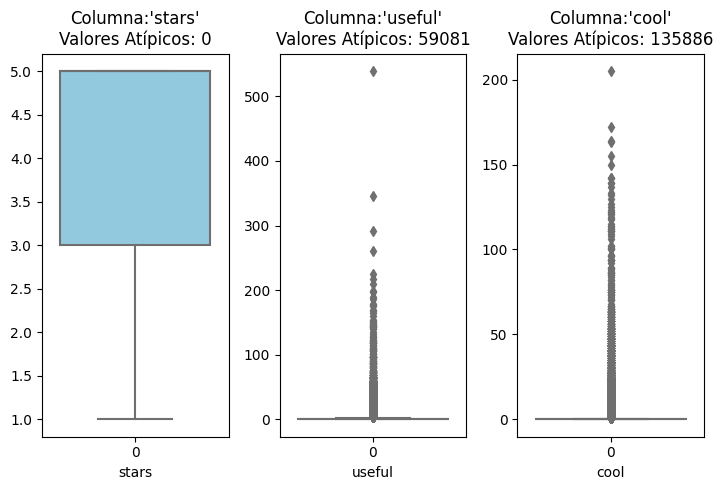

In [5]:
### Gráficas de Cajas o Bigotes, para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_reviews']
Columnas = ['stars', 'useful', 'cool']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de diagramas de caja individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.boxplot(data=ColumnasAnalizar[column], color='skyblue')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f"Columna:'{column}'\nValores Atípicos: {outliers}")
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/CajasPOHLC.png")  # Guardando la Gráfica para ser colocad en el README. 
    plt.show()

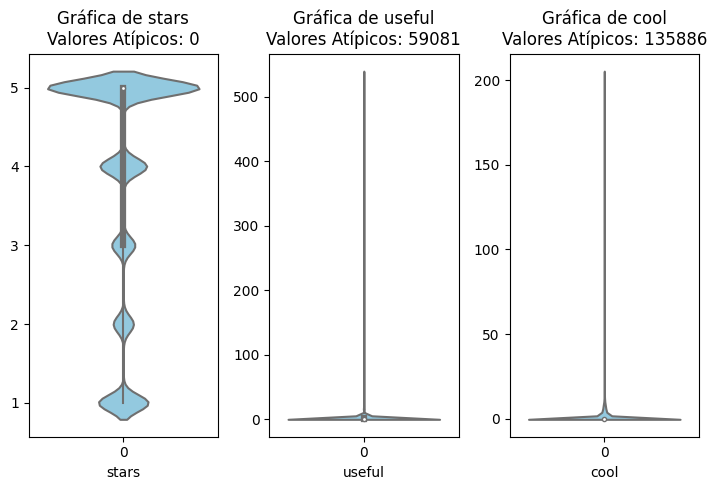

In [6]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_reviews']
Columnas = ['stars', 'useful', 'cool']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de gráficas de violín individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.violinplot(data=ColumnasAnalizar[column], color='skyblue', inner='box')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/ViolinPOHLC.png")
    plt.show()

### 3. Análisis de Correlaciones.

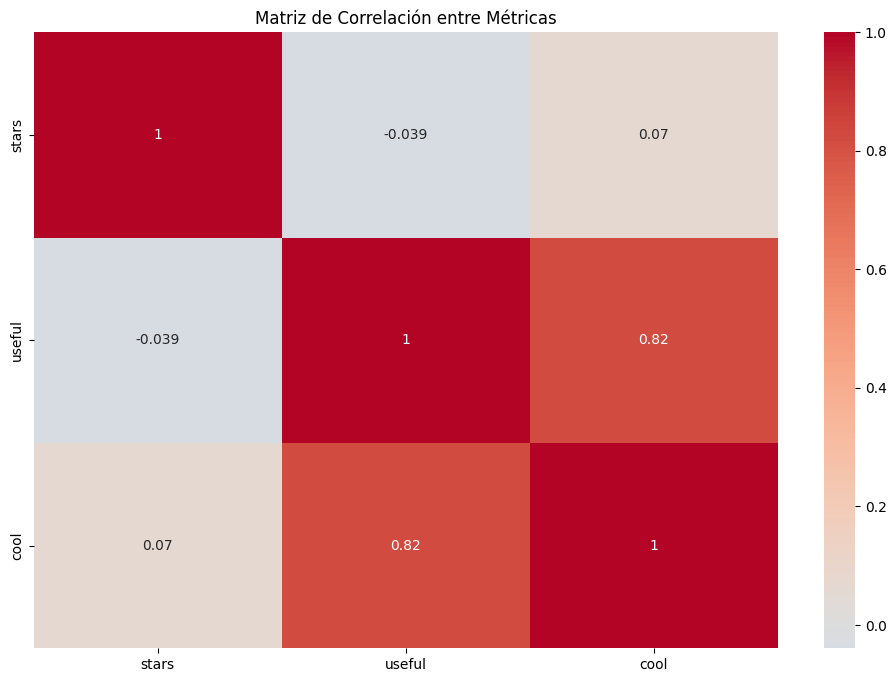

In [7]:
# Selecciona las columnas numéricas para el análisis de correlación

# Selecciona las variables
DataSets = ['yelp_reviews']
columnas_numericas = ['stars', 'useful', 'cool']

for dataset in DataSets:
    df = globals()[dataset]

    # Filtra el DataFrame para incluir solo las columnas numéricas
    df_numericas = df[columnas_numericas]

    # Calcula la matriz de correlación
    matriz_correlacion = df_numericas.corr()

    # Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación entre Métricas')
    #plt.savefig("../src/Graficas/Correlaciones.png")
    plt.show()

Se puede observar una correlacion alta entre las variables 'cool' y 'useful'

### 4. Análisis de Sentimientos en la Columna 'text'

In [6]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    700000 non-null  object        
 1   user_id      700000 non-null  object        
 2   business_id  700000 non-null  object        
 3   stars        700000 non-null  int64         
 4   useful       700000 non-null  int64         
 5   funny        700000 non-null  int64         
 6   cool         700000 non-null  int64         
 7   text         700000 non-null  object        
 8   date         700000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 48.1+ MB


In [7]:
yelp_reviews['user_id'].value_counts()

user_id
wXdbkFZsfDR7utJvbWElyA    231
vmUqcqMjlWoBM6qfmUXgyQ    167
fr1Hz2acAb3OaL3l6DyKNg    163
Sp2GV7D-_JLZMPQmDanzPQ    149
vFd8aBLg1kFcd0kCkoi-xw    138
                         ... 
T_xiLpqqHA2lVg65xd_ZUA      1
iKcB2QO4zq-RBIFM4vMJZw      1
knW8oSQJYmbbhCwPf49zmw      1
YSiWhz6LRQXoXT1nJSKJNw      1
Pz25TQRkx6C_8sh8WySICA      1
Name: count, Length: 413760, dtype: int64

In [11]:
yelp_reviews['business_id'].value_counts()

business_id
ac1AeYqs8Z4_e2X5M3if2A    3933
_ab50qdWOk0DdB6XOrBitw    2571
Zx7n8mdt8OzLRXVzolXNhQ    1640
L5LLN0RafiV1Z9cddzvuCw    1506
GBTPC53ZrG1ZBY3DT8Mbcw    1246
                          ... 
hw0O24rFx1BU5ZLlKBZYNg       1
yb3uiM0YiMnoO-_JpCY7IA       1
cVQJx4H2dtmp_SfsLu2b2g       1
bzemW777cjeRRhbU_hsNxA       1
iGlLQF5evP_4CoIb1b8c0A       1
Name: count, Length: 40192, dtype: int64

In [12]:
yelp_reviews['review_id'].value_counts()

review_id
KU_O5udG6zpxOg-VcAEodg    1
RRc34tFpLbY5nl9fCL8edw    1
bzTcuoFkapxmmMHXtF2ntw    1
2vhCow7uBhOPfAlchQxbGQ    1
AZ0PdKD1yWuCfz0x4ay_xA    1
                         ..
ITNPZtxOGhEf8tFUIIyV5A    1
XnY-N7Zna614TGbMVe-YBA    1
R104PTIYDiTkcyrhZg5_Ew    1
Lpitdk0_yzkRS2Zq6YaBYQ    1
SlaF_xhyOcYY2CshNSQEwA    1
Name: count, Length: 700000, dtype: int64

### Funcion para apalicar el Análisis de Sentimientos a la columna 'text'

In [8]:
### Funcion para apalicar el Análisis de Sentimientos a la columna 'text'

from textblob import TextBlob   #0.17.1
def analizar_sentimiento(texto):
    analysis = TextBlob(texto)
    # Puedes ajustar el umbral según tus necesidades
    if analysis.sentiment.polarity > 0:
        return '1'
    elif analysis.sentiment.polarity == 0:
        return '0'
    else:
        return '-1'


### Aplicando la función Análisis de Sentimientos

In [9]:
### Aplicando la funciaón Análisis de Sentimientos
yelp_reviews['sentimientoReviewTextBlob'] = yelp_reviews['text'].apply(analizar_sentimiento)

In [10]:
yelp_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentimientoReviewTextBlob
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07,1
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17,1
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23,1
3,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27,1
4,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07,1


In [12]:
yelp_reviews['sentimientoReviewTextBlob'].value_counts()

sentimientoReviewTextBlob
1     596805
-1     97558
0       5637
Name: count, dtype: int64

In [13]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   review_id                  700000 non-null  object        
 1   user_id                    700000 non-null  object        
 2   business_id                700000 non-null  object        
 3   stars                      700000 non-null  int64         
 4   useful                     700000 non-null  int64         
 5   funny                      700000 non-null  int64         
 6   cool                       700000 non-null  int64         
 7   text                       700000 non-null  object        
 8   date                       700000 non-null  datetime64[ns]
 9   sentimientoReviewTextBlob  700000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 53.4+ MB


In [18]:
# Configura pandas para mostrar el texto completo en la columna 'text'
pd.set_option('display.max_colwidth', None)

In [21]:
yelp_reviews[['text','sentimientoReview']]

,text,sentimientoReview
0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",1
1,"I was really between 3 and 4 stars for this one. I LOVE the 96th street Naked Tchopstix so I was very excited to see this one which is closer to my house.\nThe vibe is totally different as this is geared more to take out although they do have a decent size dining area. You order at the counter and they deliver it.\nMy daughter and I tried the sushi bowl. You pick up a piece of paper and select from a choice of proteins, vegetables, rice and toppings. I like the fact that it is on paper and you don't have to guess what things are or have to shout over the counter to tell the server what you want. The sushi bowl was good but not wonderful. The choices particularly of the vegetables seemed a little too limiting and I felt I had more rice than other food items. The sauces were tasty. My husband ordered the Maui roll which is my favorite roll at the 96th street location and this just was not up that standard. It was good but the quality and consistently was not as good as at 96th street. I would go back though and I think a lot of people would be happy with the sushi bowls. I do want to make a comment about the low reviews that people have given the place because of service. People - it is a sushi place - it isn't McDonalds- so it will be a bit slower. You are not going to order and get out of there in five minutes even though it is called express. As a healthy alternative to fast food in the area, it is worth the wait. Oh and try the bubble tea. I had the strawberry and it was quite yummy. Next time I am going to try the vanilla chai.",1
2,"My boyfriend and I tried this deli for the first time today. I had a turkey, avocado & bacon panini and he ha a buffalo chicken wrap. We will definitely be returning. The wait for food wasn't too long, which is always appreciated during lunch hour. There was SO much to choose from. They have salads, soup, macaroni, sandwiches and hot food. I love a deli that has many options to choose from!",1
3,Amazing biscuits and (fill in the blank). Great cocktails too. Highly recommended. A bit busy though.,1
4,The cafe was extremely cute. We came at 8am and they even had a jazz band playing at that time. I got the breakfast sandwich and it was delicious. I loved how they rolled the egg and put the bacon pieces inside. Great price for a filling breakfast!,1
...,...,...
699995,"This was the second time we came to Precinct pizza. Sadly again the pizza was under cooked and limp. The cannoli was outstanding. \nAdmittedly this was the first week of opening, so we will return again soon.\n\nWe returned after a couple of mounts after they have settled in, and I must say that their pizzas were outstanding as well as their garlic knots which are the size of little rolls. Outstanding!\nWe will be returning again very soon.",1
699996,"Just spent the weekend in Nashville for our hockey tournament at the Ford Ice Center. We really enjoyed our time here. Very nice, clean rink! hope we play here again.",1
699997,best Indian food in St. Louis there is nothing close to their level \n\ntheir lunch special is my favorite but I also enjoy coming in for dinner \n\nthey make no comprises when it comes to quality,1
699998,"The rice was super hard could possibly chip a tooth. The lo mein taste like just straight dough. The spring rolls were cold. The signs were confusing and difficult to see what food was what. Staffwas unfriendly when asking for assistance. Was in the place for 10 mins or l

In [22]:
pd.reset_option('display.max_colwidth')

### Funcion para totalizar el numero de palabras en cada texto

In [50]:
### Función para contar palabras en un texto
def contar_palabras(texto):
    palabras = texto.split()  # Dividir el texto en palabras utilizando espacios en blanco como separador
    return len(palabras)

### Aplicando la funcion contar plabras al dataset de 'yelp_reviews'

In [24]:
# Aplicar la función a la columna 'text' y crear una nueva columna 'longitud_palabras'
yelp_reviews['longitud_palabras'] = yelp_reviews['text'].apply(contar_palabras)

# Mostrar el DataFrame resultante
yelp_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentimientoReview,longitud_palabras
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07,1,101
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17,1,313
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23,1,73
3,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27,1,16
4,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07,1,48
...,...,...,...,...,...,...,...,...,...,...,...
699995,hhl8Nozr0tADgVjtX3JlVw,e7xUNW5THOyDrni0W662Zw,6KJTlLbdMH4jdDrYHZNv6w,4,1,0,1,This was the second time we came to Precinct p...,2018-03-29,1,79
699996,LohgzhBttHyNv_D2Z_uB1g,Kh9mzyE3bRUAWCMyOVn53g,5FnHWI9_ffeLxPZXWYULjA,5,0,0,0,Just spent the weekend in Nashville for our ho...,2019-03-11,1,30
699997,Wj9aENIJf2a7dUMs-2kMQQ,8ccg7g0R0JXhjjta1ZzEfA,-6jVwUuXC1-dyr2YRCEU6Q,5,0,1,0,best Indian food in St. Louis there is nothing...,2019-06-20,1,36
699998,_Crlj7DAPJWDVN2Ti4c47w,Pz25TQRkx6C_8sh8WySICA,ntu7zZ4myxSVDUlpwK26aA,1,0,0,0,The rice was super hard could possibly chip a ...,2019-07-12,-1,105


In [14]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   review_id                  700000 non-null  object        
 1   user_id                    700000 non-null  object        
 2   business_id                700000 non-null  object        
 3   stars                      700000 non-null  int64         
 4   useful                     700000 non-null  int64         
 5   funny                      700000 non-null  int64         
 6   cool                       700000 non-null  int64         
 7   text                       700000 non-null  object        
 8   date                       700000 non-null  datetime64[ns]
 9   sentimientoReviewTextBlob  700000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 53.4+ MB


In [16]:
yelp_reviews['sentimientoReviewTextBlob'] = pd.to_numeric(yelp_reviews['sentimientoReviewTextBlob'], errors='coerce')
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   review_id                  700000 non-null  object        
 1   user_id                    700000 non-null  object        
 2   business_id                700000 non-null  object        
 3   stars                      700000 non-null  int64         
 4   useful                     700000 non-null  int64         
 5   funny                      700000 non-null  int64         
 6   cool                       700000 non-null  int64         
 7   text                       700000 non-null  object        
 8   date                       700000 non-null  datetime64[ns]
 9   sentimientoReviewTextBlob  700000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 53.4+ MB


### Aplicando Nuevamente Correlación con las nuevas columnas de Análisis de sentimientos

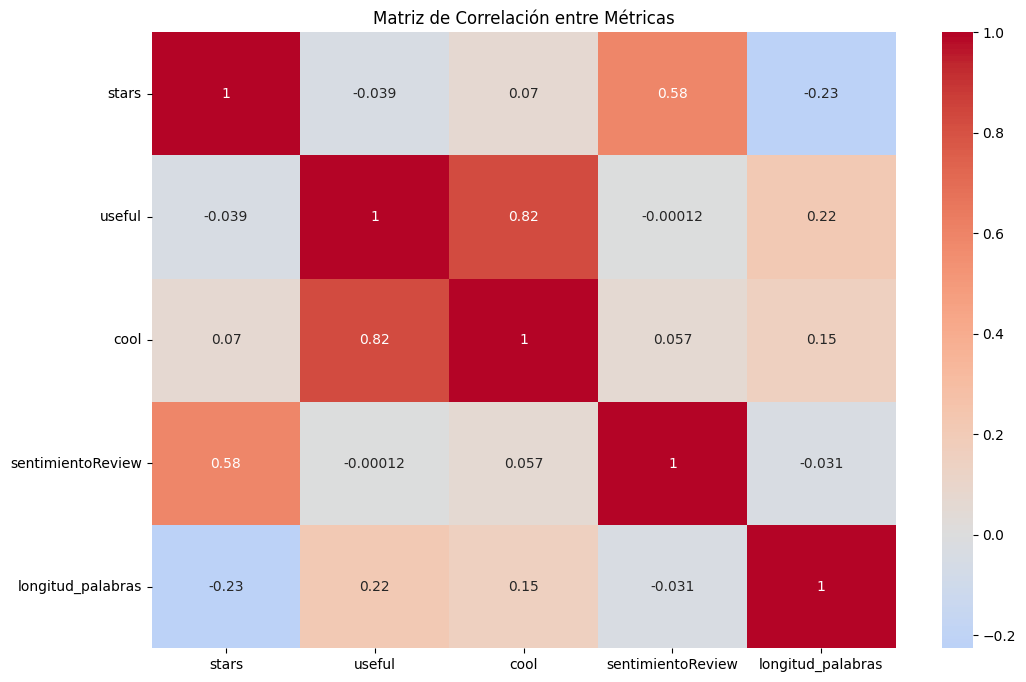

In [28]:
# Selecciona las columnas numéricas para el análisis de correlación

# Selecciona las variables
DataSets = ['yelp_reviews']
columnas_numericas = ['stars', 'useful', 'cool', 'sentimientoReview', 'longitud_palabras']

for dataset in DataSets:
    df = globals()[dataset]

    # Filtra el DataFrame para incluir solo las columnas numéricas
    df_numericas = df[columnas_numericas]

    # Calcula la matriz de correlación
    matriz_correlacion = df_numericas.corr()

    # Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación entre Métricas')
    #plt.savefig("../src/Graficas/Correlaciones.png")
    plt.show()

In [ ]:
### Gráfica de Dispersion entre dos variables

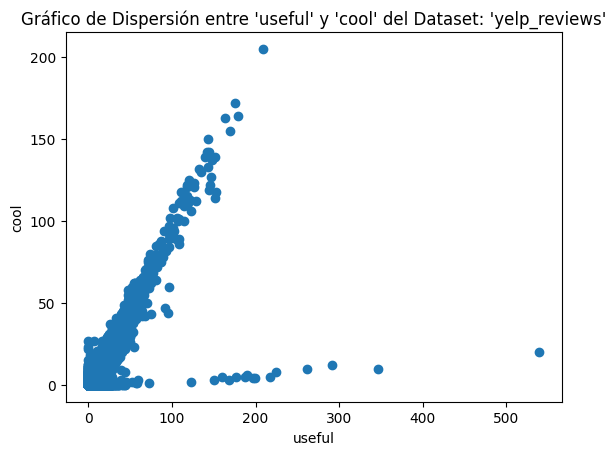

In [31]:
### Gráfico de Dispersion entre dos variables

# Selecciona las variables
DataSets = ['yelp_reviews']
columnas_X = 'useful'
columnas_Y = 'cool'

for dataset in DataSets:
    df = globals()[dataset]

    # Crear el gráfico de dispersión
    plt.scatter(df[columnas_X], df[columnas_Y])

    # Etiquetas de los ejes
    plt.xlabel(columnas_X)
    plt.ylabel(columnas_Y)

    # Título del gráfico
    plt.title(f"Gráfico de Dispersión entre '{columnas_X}' y '{columnas_Y}' del Dataset: '{','.join(DataSets)}'")

    # Mostrar el gráfico
    plt.show()

In [17]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   review_id                  700000 non-null  object        
 1   user_id                    700000 non-null  object        
 2   business_id                700000 non-null  object        
 3   stars                      700000 non-null  int64         
 4   useful                     700000 non-null  int64         
 5   funny                      700000 non-null  int64         
 6   cool                       700000 non-null  int64         
 7   text                       700000 non-null  object        
 8   date                       700000 non-null  datetime64[ns]
 9   sentimientoReviewTextBlob  700000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 53.4+ MB


### Guardar Dataset Final de yelp_reviews

In [18]:
### Guardar Dataset Final de yelp_user

# Ruta completa en Cloud Storage para guardar el archivo en formato CSV
ruta_eda_datalike = "gs://gmy/eda/yelp_reviews.parquet"

# Guarda el DataFrame en formato CSV en Cloud Storage
yelp_reviews.to_parquet(ruta_eda_datalike, index=False)

### 2) EDA del Dataset: 'yelp_business'

In [3]:
### Cargando el ETL del Dataset 'yelp_bussines'
# Ruta completa en Cloud Storage
ruta_etl_datalike = "gs://gmy/etl/yelp_business.csv"

# Lee el archivo Parquet directamente en un DataFrame de pandas
yelp_bussines = pd.read_csv(ruta_etl_datalike, storage_options={"project": "Proyecto Final - Henry"})
yelp_bussines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145216 entries, 0 to 145215
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   145216 non-null  object 
 1   name          145216 non-null  object 
 2   address       145216 non-null  object 
 3   city          145216 non-null  object 
 4   state         145216 non-null  object 
 5   latitude      145216 non-null  float64
 6   longitude     145216 non-null  float64
 7   stars         145216 non-null  float64
 8   review_count  145216 non-null  int64  
 9   attributes    132343 non-null  object 
 10  categories    145114 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.2+ MB


In [4]:
yelp_bussines.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
latitude            0
longitude           0
stars               0
review_count        0
attributes      12873
categories        102
dtype: int64

### 1. Análisis Valores Faltantes.

In [5]:
### Información Detallada de las siguientes columnas:
Columnas = ['attributes', 'categories']
DataSets = ['yelp_bussines']

for dataset in DataSets:
    df = globals()[dataset]
    print(f"Información del DataSets: {DataSets}")
    print("="*80)
    for columna in Columnas:
        print(f"Analizando los Valores Nulos en la Columna:   '{columna}'")
        print(f"Total Registros: {df.shape[0]}")
        print(f"Total Valores Nulos: {df[columna].isna().sum()}")
        print(f"Porcentaje Valores Nulos: {round((df[columna].isna().sum()/df.shape[0])*100,3)} %")
        #print(f"Valor/es de la Moda:\n{df[Columna].mode()[0]}")
        #print(f"Estadistica Descriptiva de la Columna {Columna}:\n{df[Columna].describe()}")
        print("="*80)

Información del DataSets: ['yelp_bussines']
Analizando los Valores Nulos en la Columna:   'attributes'
Total Registros: 145216
Total Valores Nulos: 12873
Porcentaje Valores Nulos: 8.865 %
Analizando los Valores Nulos en la Columna:   'categories'
Total Registros: 145216
Total Valores Nulos: 102
Porcentaje Valores Nulos: 0.07 %


### Eliminando los registros con valones nulos de las siguientes columnas:

In [6]:
### Eliminando los registros con valones nulos de las siguientes columnas:
Columnas = ['attributes', 'categories']
DataSets = ['yelp_bussines']

for dataset in DataSets:
    for columna in Columnas:
        df = globals()[dataset]
        df.dropna(subset=columna, inplace=True)
        #print(f"Visualizando Filas con Valores Nulos de la Columna '{columna}' del Dataset: '{','.join(DataSets)}'")
        #print("="*88)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132342 entries, 0 to 145215
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   132342 non-null  object 
 1   name          132342 non-null  object 
 2   address       132342 non-null  object 
 3   city          132342 non-null  object 
 4   state         132342 non-null  object 
 5   latitude      132342 non-null  float64
 6   longitude     132342 non-null  float64
 7   stars         132342 non-null  float64
 8   review_count  132342 non-null  int64  
 9   attributes    132342 non-null  object 
 10  categories    132342 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.1+ MB


### 2. Análisis de Valores Outliers.

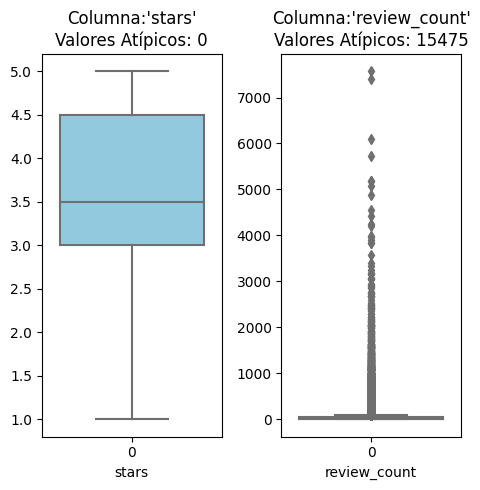

In [45]:
### Gráficas de Cajas o Bigotes, para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_bussines']
Columnas = ['stars', 'review_count']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de diagramas de caja individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.boxplot(data=ColumnasAnalizar[column], color='skyblue')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f"Columna:'{column}'\nValores Atípicos: {outliers}")
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/CajasPOHLC.png")  # Guardando la Gráfica para ser colocad en el README. 
    plt.show()

### Gráficas de Violín

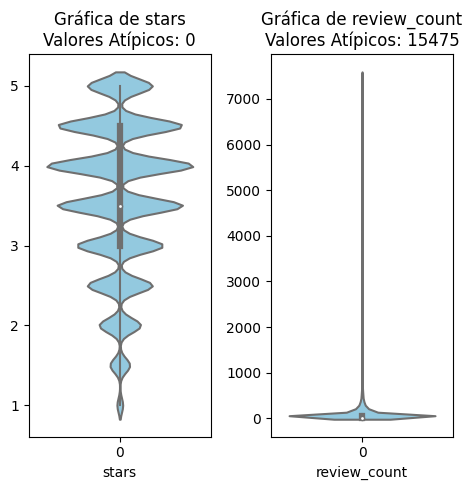

In [46]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_bussines']
Columnas = ['stars', 'review_count']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de gráficas de violín individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.violinplot(data=ColumnasAnalizar[column], color='skyblue', inner='box')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/ViolinPOHLC.png")
    plt.show()

### 3. Análisis de Correlaciones.

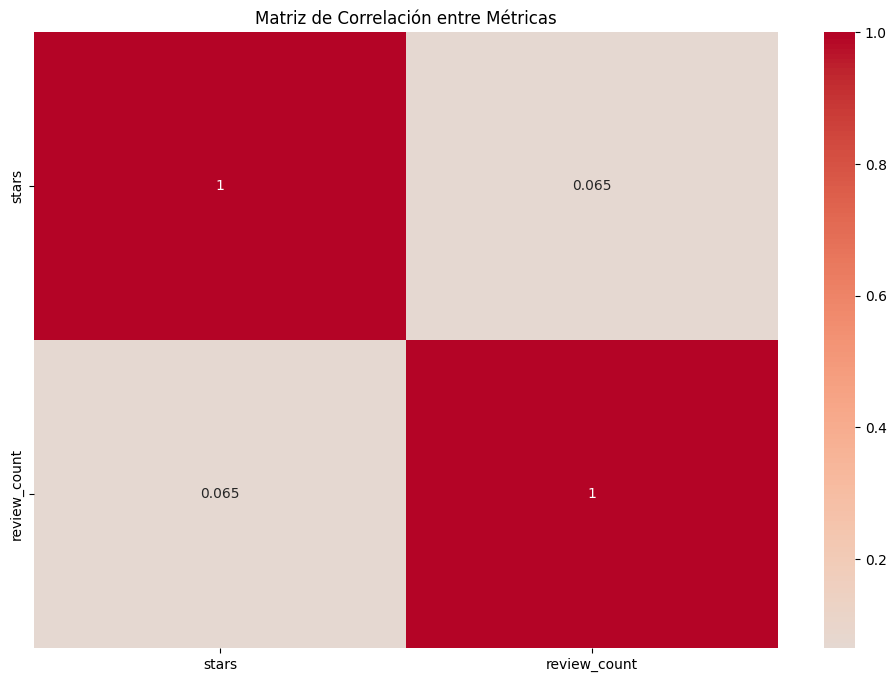

In [47]:
# Selecciona las columnas numéricas para el análisis de correlación

# Selecciona las variables
DataSets = ['yelp_bussines']
columnas_numericas = ['stars', 'review_count']

for dataset in DataSets:
    df = globals()[dataset]

    # Filtra el DataFrame para incluir solo las columnas numéricas
    df_numericas = df[columnas_numericas]

    # Calcula la matriz de correlación
    matriz_correlacion = df_numericas.corr()

    # Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación entre Métricas')
    #plt.savefig("../src/Graficas/Correlaciones.png")
    plt.show()

In [7]:
yelp_bussines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132342 entries, 0 to 145215
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   132342 non-null  object 
 1   name          132342 non-null  object 
 2   address       132342 non-null  object 
 3   city          132342 non-null  object 
 4   state         132342 non-null  object 
 5   latitude      132342 non-null  float64
 6   longitude     132342 non-null  float64
 7   stars         132342 non-null  float64
 8   review_count  132342 non-null  int64  
 9   attributes    132342 non-null  object 
 10  categories    132342 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.1+ MB


### Guardar Dataset Final de yelp_bussines

In [8]:
### Guardar Dataset Final de yelp_bussines

# Ruta completa en Cloud Storage para guardar el archivo en formato PARQUET
ruta_eda_datalike = "gs://gmy/eda/yelp_bussines.parquet"

# Guarda el DataFrame en formato CSV en Cloud Storage
yelp_bussines.to_parquet(ruta_eda_datalike, index=False)

### 3) EDA del Dataset: 'yelp_tip'

### Cargando el ETL del Dataset 'yelp_tip'

In [19]:
### Cargando el ETL del Dataset 'yelp_tip'
# Ruta completa en Cloud Storage
ruta_etl_datalike = "gs://gmy/etl/yelp_tips.csv"

# Lee el archivo Parquet directamente en un DataFrame de pandas
yelp_tips = pd.read_csv(ruta_etl_datalike, storage_options={"project": "Proyecto Final - Henry"})
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193033 entries, 0 to 193032
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           193033 non-null  object
 1   business_id       193033 non-null  object
 2   text              193030 non-null  object
 3   date              193033 non-null  object
 4   compliment_count  193033 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.4+ MB


### Convertiendo la columna 'date' en formato fecha

In [20]:
### Convertiendo la columna 'date' en formato fecha
yelp_tips['date'] = pd.to_datetime(yelp_tips['date'], format='%Y-%m-%d', errors='coerce')
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193033 entries, 0 to 193032
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           193033 non-null  object        
 1   business_id       193033 non-null  object        
 2   text              193030 non-null  object        
 3   date              193033 non-null  datetime64[ns]
 4   compliment_count  193033 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.4+ MB


### 1. Análisis Valores Faltantes.

In [21]:
yelp_tips.isna().sum()

user_id             0
business_id         0
text                3
date                0
compliment_count    0
dtype: int64

### Información Detallada de la Columna: 'text'

In [18]:
### Información Detallada de la Columna: 'text'
DataSets = ['yelp_tips']
Columna = 'text'

for dataset in DataSets:
    df = globals()[dataset]
    print("="*80)
    print(f"Información del DataSets: '{','.join(DataSets)}'")
    print(f"Información Detallada de la Columna: '{Columna}'")
    print(f"Total Registros: {df.shape[0]}")
    print(f"Total Valores Nulos: {df[Columna].isna().sum()}")
    print(f"Porcentaje Valores Nulos: {round((df[Columna].isna().sum()/df.shape[0])*100,3)} %")
    #print(f"Valor/es de la Moda:\n{df[Columna].mode()[0]}")
    #print(f"Estadistica Descriptiva de la Columna {Columna}:\n{df[Columna].describe()}")
    print("="*80)

Información del DataSets: 'yelp_tips'
Información Detallada de la Columna: 'text'
Total Registros: 193033
Total Valores Nulos: 3
Porcentaje Valores Nulos: 0.002 %


### Visualizando Valores Nulos de la Columna 'text'

In [19]:
### Visualizando Valores Nulos de la Columna 'text'

DataSets = ['yelp_tips']
Columna = 'text'

for dataset in DataSets:
    df = globals()[dataset] 
    print(f"Visualizando Filas con Valores Nulos de la Columna '{Columna}' del Dataset: '{','.join(DataSets)}'")
    print("="*88)
df[df[Columna].isna()]

Visualizando Filas con Valores Nulos de la Columna 'text' del Dataset: 'yelp_tips'


,user_id,business_id,text,date,compliment_count
47618,9Ba1QLi-_n5ijOUYpGdY0Q,OcCrSDYR5cETO4FZ7R2iEg,NaN,2020-01-22,0
73359,FSR2WfAqiCX9tg91fsluZw,eLi0bpsDoWQkBhJX1d46tg,NaN,2021-10-09,0
131032,xIBXtscIpUarsWO-jr8Y0Q,EkGrpiN5gN6TaSfVQ0ggvA,NaN,2019-04-13,0


Dado que el porcentaje de valores nulos es muy pequeño (0.002%) se procede a eliminar dichos registros

In [22]:
### Eliminando Las 3 Filas con Valores Nulos
DataSets = ['yelp_tips']
Columna = 'text'

for dataset in DataSets:
    df = globals()[dataset]
    df.dropna(subset=[Columna], inplace=True)
    print(f"Visualizando Filas con Valores Nulos de la Columna '{Columna}' del Dataset: '{','.join(DataSets)}'")
    print("="*88)
df[df[Columna].isna()]

Visualizando Filas con Valores Nulos de la Columna 'text' del Dataset: 'yelp_tips'


,user_id,business_id,text,date,compliment_count


### 2. Análisis de Valores Outliers.

In [22]:
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193030 entries, 0 to 193032
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           193030 non-null  object        
 1   business_id       193030 non-null  object        
 2   text              193030 non-null  object        
 3   date              193030 non-null  datetime64[ns]
 4   compliment_count  193030 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.8+ MB


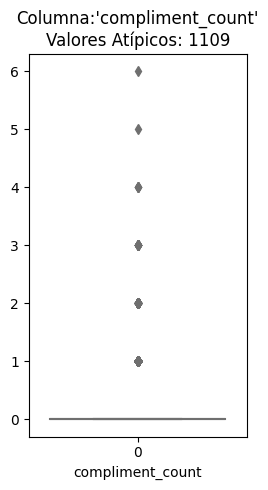

In [23]:
### Gráficas de Cajas o Bigotes, para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_tips']
Columnas = ['compliment_count']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de diagramas de caja individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.boxplot(data=ColumnasAnalizar[column], color='skyblue')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f"Columna:'{column}'\nValores Atípicos: {outliers}")
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/CajasPOHLC.png")  # Guardando la Gráfica para ser colocad en el README. 
    plt.show()

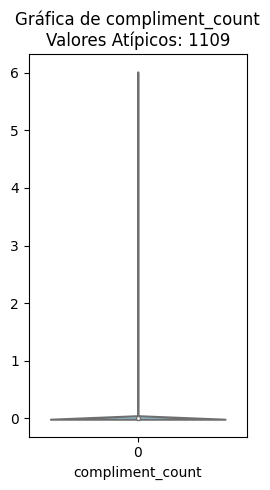

In [24]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_tips']
Columnas = ['compliment_count']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de gráficas de violín individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.violinplot(data=ColumnasAnalizar[column], color='skyblue', inner='box')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/ViolinPOHLC.png")
    plt.show()

In [46]:
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193030 entries, 0 to 193032
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           193030 non-null  object        
 1   business_id       193030 non-null  object        
 2   text              193030 non-null  object        
 3   date              193030 non-null  datetime64[ns]
 4   compliment_count  193030 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.9+ MB


### Aplicando la funciaón Análisis de Sentimientos

In [25]:
### Aplicando la funciaón Análisis de Sentimientos
yelp_tips['sentimientoTipsTextBlob'] = yelp_tips['text'].apply(analizar_sentimiento)

In [48]:
yelp_tips.head(5)

,user_id,business_id,text,date,compliment_count,sentimientoTips
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01,0,1
1,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14,0,1
2,XJDLaoN1PerKw2woiKeepA,t0zwddmbOGQOADrAxEPHQQ,Come by for some Jelly Bean sours this weekend!,2018-03-31,0,0
3,9M_nk0kA3CTJt6UoxRAK_g,oJf3IZloLf_PDeEeZW5nDg,Meatball sandwich,2018-03-27,0,0
4,0LY6l9-Z2IrVtnfj6OX06w,Zmwm6d872C8kWJr4b6UGfg,Great tasty food,2018-04-01,0,1


In [ ]:
### Aplicar la función a la columna 'text' y crear una nueva columna 'longitud_palabrasTips'

In [52]:
# Aplicar la función a la columna 'text' y crear una nueva columna 'longitud_palabras'
yelp_tips['longitud_palabrasTips'] = yelp_tips['text'].apply(contar_palabras)

# Mostrar el DataFrame resultante
yelp_tips

,user_id,business_id,text,date,compliment_count,sentimientoTips,longitud_palabrasTips
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01,0,1,8
1,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14,0,1,6
2,XJDLaoN1PerKw2woiKeepA,t0zwddmbOGQOADrAxEPHQQ,Come by for some Jelly Bean sours this weekend!,2018-03-31,0,0,9
3,9M_nk0kA3CTJt6UoxRAK_g,oJf3IZloLf_PDeEeZW5nDg,Meatball sandwich,2018-03-27,0,0,2
4,0LY6l9-Z2IrVtnfj6OX06w,Zmwm6d872C8kWJr4b6UGfg,Great tasty food,2018-04-01,0,1,3
...,...,...,...,...,...,...,...
193028,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11,0,-1,6
193029,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30,0,1,4
193030,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05,0,1,3
193031,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20,0,1,4


In [26]:
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193030 entries, 0 to 193032
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  193030 non-null  object        
 1   business_id              193030 non-null  object        
 2   text                     193030 non-null  object        
 3   date                     193030 non-null  datetime64[ns]
 4   compliment_count         193030 non-null  int64         
 5   sentimientoTips          193030 non-null  object        
 6   sentimientoTipsTextBlob  193030 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.8+ MB


In [54]:
yelp_tips['sentimientoTips'] = pd.to_numeric(yelp_tips['sentimientoTips'], errors='coerce')
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193030 entries, 0 to 193032
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                193030 non-null  object        
 1   business_id            193030 non-null  object        
 2   text                   193030 non-null  object        
 3   date                   193030 non-null  datetime64[ns]
 4   compliment_count       193030 non-null  int64         
 5   sentimientoTips        193030 non-null  int64         
 6   longitud_palabrasTips  193030 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.8+ MB


### Análisis de Correlaciones

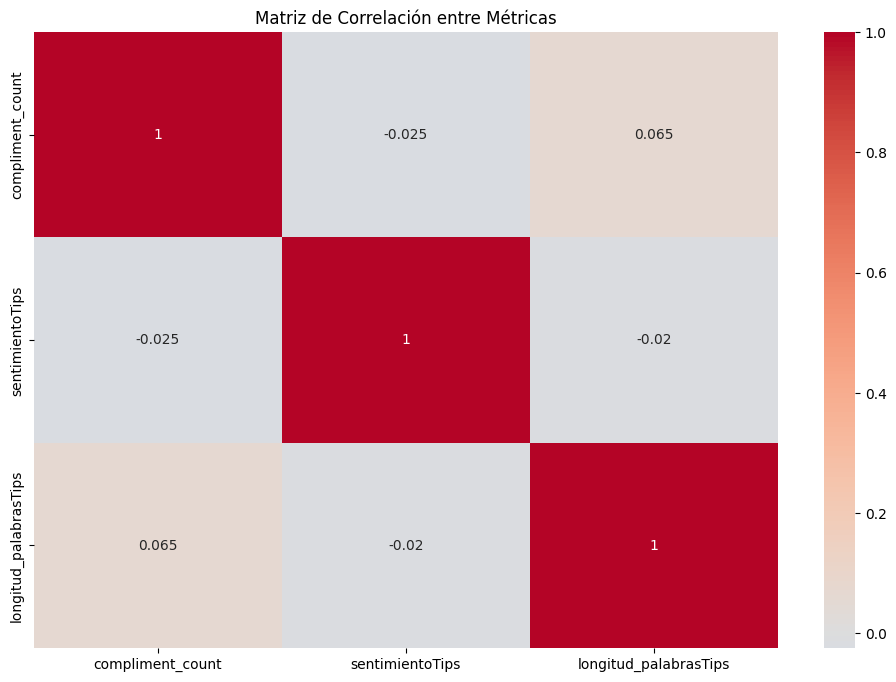

In [55]:
# Selecciona las columnas numéricas para el análisis de correlación

# Selecciona las variables
DataSets = ['yelp_tips']
columnas_numericas = ['compliment_count', 'sentimientoTips', 'longitud_palabrasTips']

for dataset in DataSets:
    df = globals()[dataset]

    # Filtra el DataFrame para incluir solo las columnas numéricas
    df_numericas = df[columnas_numericas]

    # Calcula la matriz de correlación
    matriz_correlacion = df_numericas.corr()

    # Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación entre Métricas')
    #plt.savefig("../src/Graficas/Correlaciones.png")
    plt.show()

In [56]:
yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193030 entries, 0 to 193032
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                193030 non-null  object        
 1   business_id            193030 non-null  object        
 2   text                   193030 non-null  object        
 3   date                   193030 non-null  datetime64[ns]
 4   compliment_count       193030 non-null  int64         
 5   sentimientoTips        193030 non-null  int64         
 6   longitud_palabrasTips  193030 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.8+ MB


### Guardar Dataset Final de 'yelp_tip'

In [27]:
### Guardar Dataset Final de 'yelp_tips'

# Ruta completa en Cloud Storage para guardar el archivo en formato PARQUET
ruta_eda_datalike = "gs://gmy/eda/yelp_tips.parquet"

# Guarda el DataFrame en formato CSV en Cloud Storage
yelp_tips.to_parquet(ruta_eda_datalike, index=False)

### 4) EDA del Dataset: 'yelp_user'

### Cargando el ETL del Dataset 'yelp_user'

In [14]:
### Cargando el ETL del Dataset 'yelp_user'
# Ruta completa en Cloud Storage
ruta_etl_datalike = "gs://gmy/etl/yelp_users.csv"

# Lee el archivo Parquet directamente en un DataFrame de pandas
yelp_users = pd.read_csv(ruta_etl_datalike, storage_options={"project": "Proyecto Final - Henry"})
yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329174 entries, 0 to 329173
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        329174 non-null  object 
 1   review_count   329174 non-null  int64  
 2   yelping_since  329174 non-null  object 
 3   useful         329174 non-null  int64  
 4   cool           329174 non-null  int64  
 5   elite          4141 non-null    object 
 6   fans           329174 non-null  int64  
 7   average_stars  329174 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 20.1+ MB


/var/tmp/ipykernel_110824/3323563863.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  yelp_users = pd.read_csv(ruta_etl_datalike, storage_options={"project": "Proyecto Final - Henry"})


In [28]:
yelp_users.head(5)

,user_id,review_count,yelping_since,useful,cool,elite,fans,average_stars
0,TIvO4GClIYXzxu_jVZ7ruQ,2,2018-01-01,2,0,NaN,0,5.00
1,Bxz-sFWLiPx-rR99eBr6TQ,1,2018-01-01,7,1,NaN,0,1.00
2,-t7FxAVyh_2XQvi_PvVQkg,1,2018-01-01,0,0,NaN,0,2.00
3,9JZLK2tiLUsFLD3wZdUIWQ,3,2018-01-01,2,1,NaN,0,1.33
4,J7Y_oLaopwipWnTR8OgVEA,1,2018-01-01,0,0,NaN,0,5.00


### Convertiendo la columna 'yelping_since' a formato fecha

In [29]:
### Convertiendo la columna 'yelping_since' en formato fecha
yelp_users['yelping_since'] = pd.to_datetime(yelp_users['yelping_since'], format='%Y-%m-%d', errors='coerce')
yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329174 entries, 0 to 329173
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        329174 non-null  object        
 1   review_count   329174 non-null  int64         
 2   yelping_since  329174 non-null  datetime64[ns]
 3   useful         329174 non-null  int64         
 4   cool           329174 non-null  int64         
 5   elite          4141 non-null    object        
 6   fans           329174 non-null  int64         
 7   average_stars  329174 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 20.1+ MB


### 1. Análisis Valores Faltantes.

In [30]:
yelp_users.isna().sum()

user_id               0
review_count          0
yelping_since         0
useful                0
cool                  0
elite            325033
fans                  0
average_stars         0
dtype: int64

In [31]:
### Información Detallada de la Columna: 'elite'
DataSets = ['yelp_users']
Columna = 'elite'

for dataset in DataSets:
    df = globals()[dataset]
    print(f"Información del DataSets: {','.join(DataSets)}")
    print(f"Información Detallada de la Columna: {Columna}")
    print("="*80)
    print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
    print(f"Total Registros: {df.shape[0]}")
    print(f"Total Valores Nulos: {df[Columna].isna().sum()}")
    print(f"Porcentaje Valores Nulos: {round((df[Columna].isna().sum()/df.shape[0])*100,3)} %")
    #print(f"Valor/es de la Moda:\n{df[Columna].mode()[0]}")
    #print(f"Estadistica Descriptiva de la Columna {Columna}:\n{df[Columna].describe()}")
    print("="*80)

Información del DataSets: yelp_users
Información Detallada de la Columna: elite
Analizando los Valores Nulos en la Columna:   'elite'
Total Registros: 329174
Total Valores Nulos: 325033
Porcentaje Valores Nulos: 98.742 %


Se procede a eliminar la columna 'elite' ya que contiene mas del 95% de valores Nulos

### Eliminando Columna del Dataset 'yelp_users'

In [34]:
### Eliminando Columnas del Dataset 'yelp_users'

Columnas_to_Eliminar = ['elite']

### Elimina las columnas especificadas del DataFrame
yelp_users = yelp_users.drop(Columnas_to_Eliminar, axis=1)
yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329174 entries, 0 to 329173
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        329174 non-null  object        
 1   review_count   329174 non-null  int64         
 2   yelping_since  329174 non-null  datetime64[ns]
 3   useful         329174 non-null  int64         
 4   cool           329174 non-null  int64         
 5   fans           329174 non-null  int64         
 6   average_stars  329174 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 17.6+ MB


### 2. Análisis de Valores Outliers.

### Gráficas de Cajas o Bigotes

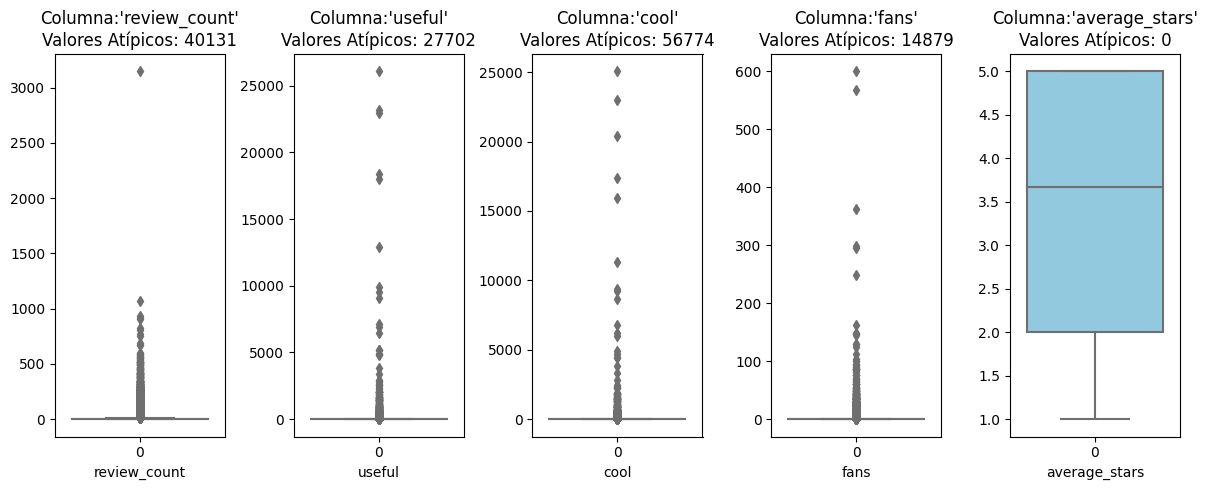

In [35]:
### Gráficas de Cajas o Bigotes, para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_users']
Columnas = ['review_count', 'useful', 'cool', 'fans', 'average_stars']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de diagramas de caja individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.boxplot(data=ColumnasAnalizar[column], color='skyblue')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f"Columna:'{column}'\nValores Atípicos: {outliers}")
        plt.xlabel(column)

    plt.tight_layout()
    #ruta = "gs://gmy/Graficas/CajasYelp_User.png"
    #plt.savefig(ruta)  # Guardando la Gráfica para ser colocad en el README. 
    plt.show()

### Gráficas de Violín

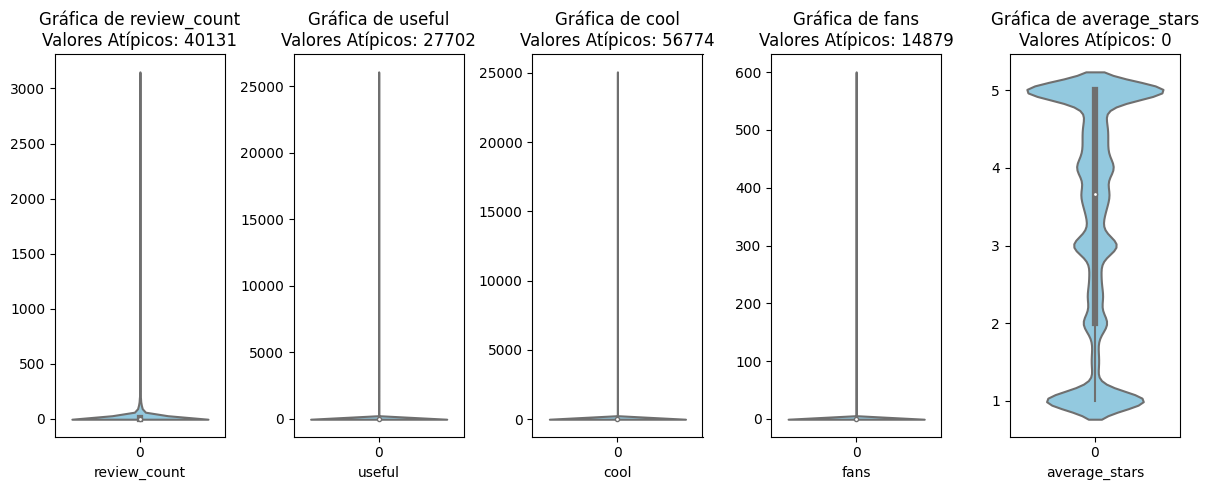

In [37]:
### Gráficas de Violín para Visualizar los Valores Atípicos

# Selecciona las variables
DataSets = ['yelp_users']
Columnas = ['review_count', 'useful', 'cool', 'fans', 'average_stars']

for dataset in DataSets:
    df = globals()[dataset]

    ColumnasAnalizar = df[Columnas]

    # Crea subplots de gráficas de violín individuales para cada variable
    plt.figure(figsize=(12, 5))
    for i, column in enumerate(ColumnasAnalizar.columns, 1):
        plt.subplot(1, 5, i)
        sns.violinplot(data=ColumnasAnalizar[column], color='skyblue', inner='box')

        # Calcula la cantidad de valores atípicos
        q1 = ColumnasAnalizar[column].quantile(0.25)
        q3 = ColumnasAnalizar[column].quantile(0.75)
        iqr = q3 - q1
        outliers = ((ColumnasAnalizar[column] < q1 - 1.5 * iqr) | (ColumnasAnalizar[column] > q3 + 1.5 * iqr)).sum()

        plt.title(f'Gráfica de {column}\nValores Atípicos: {outliers}')
        plt.xlabel(column)

    plt.tight_layout()
    #plt.savefig("../src/Graficas/ViolinPOHLC.png")
    plt.show()

### 3. Análisis de Correlaciones.

In [39]:
yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329174 entries, 0 to 329173
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        329174 non-null  object        
 1   review_count   329174 non-null  int64         
 2   yelping_since  329174 non-null  datetime64[ns]
 3   useful         329174 non-null  int64         
 4   cool           329174 non-null  int64         
 5   fans           329174 non-null  int64         
 6   average_stars  329174 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 17.6+ MB


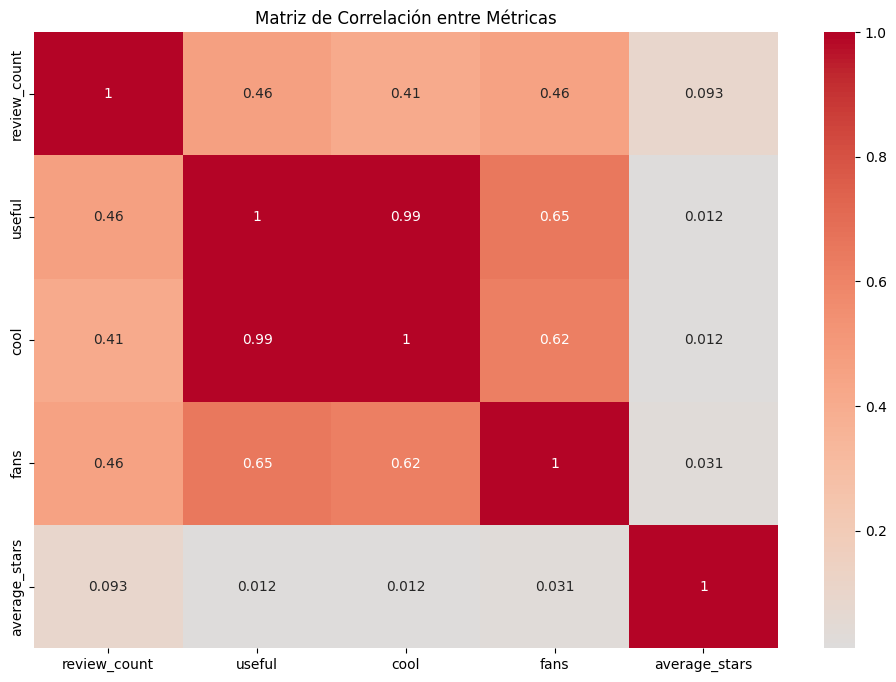

In [41]:
# Selecciona las columnas numéricas para el análisis de correlación

# Selecciona las variables
DataSets = ['yelp_users']
columnas_numericas = ['review_count', 'useful', 'cool', 'fans', 'average_stars']

for dataset in DataSets:
    df = globals()[dataset]

    # Filtra el DataFrame para incluir solo las columnas numéricas
    df_numericas = df[columnas_numericas]

    # Calcula la matriz de correlación
    matriz_correlacion = df_numericas.corr()

    # Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación entre Métricas')
    #plt.savefig("../src/Graficas/Correlaciones.png")
    plt.show()

Se puede observar que existen una correlación alta entre las variables: 'useful' y 'cool' (correlacion = 0.99)<br>

### Gráficas de Dispersión

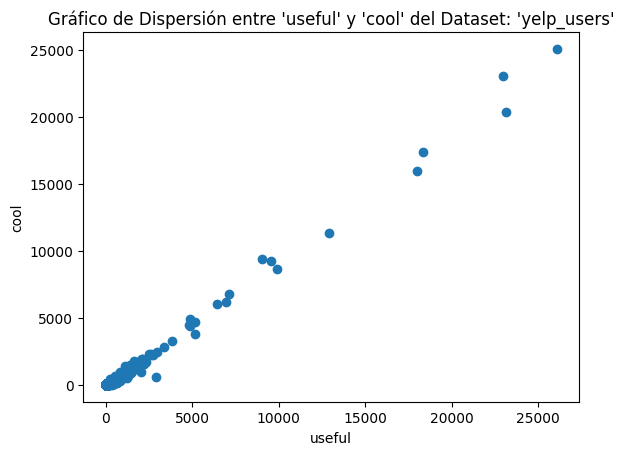

In [42]:
### Gráfico de Dispersion entre dos variables

# Selecciona las variables
DataSets = ['yelp_users']
columnas_X = 'useful'
columnas_Y = 'cool'

for dataset in DataSets:
    df = globals()[dataset]

    # Crear el gráfico de dispersión
    plt.scatter(df[columnas_X], df[columnas_Y])

    # Etiquetas de los ejes
    plt.xlabel(columnas_X)
    plt.ylabel(columnas_Y)

    # Título del gráfico
    plt.title(f"Gráfico de Dispersión entre '{columnas_X}' y '{columnas_Y}' del Dataset: '{','.join(DataSets)}'")

    # Mostrar el gráfico
    plt.show()

### Guardar Dataset Final de 'yelp_user'

In [43]:
### Guardar Dataset Final de 'yelp_user'

# Ruta completa en Cloud Storage para guardar el archivo en formato PARQUET
ruta_eda_datalike = "gs://gmy/eda/yelp_users.parquet"

# Guarda el DataFrame en formato CSV en Cloud Storage
yelp_users.to_parquet(ruta_eda_datalike, index=False)

### 4. Análisis la Columna de Atributos del Dataset: 'yelp_bussines'.

In [44]:
yelp_bussines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132342 entries, 0 to 145215
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   132342 non-null  object 
 1   name          132342 non-null  object 
 2   address       132342 non-null  object 
 3   city          132342 non-null  object 
 4   state         132342 non-null  object 
 5   latitude      132342 non-null  float64
 6   longitude     132342 non-null  float64
 7   stars         132342 non-null  float64
 8   review_count  132342 non-null  int64  
 9   attributes    132342 non-null  object 
 10  categories    132342 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.1+ MB


In [51]:
yelp_bussines[['business_id', 'attributes']]

,business_id,attributes
0,MTSW4McQd7CbVtyjqoe9mw,"{'RestaurantsDelivery': 'False', 'OutdoorSeati..."
1,mWMc6_wTdE0EUBKIGXDVfA,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc..."
2,CF33F8-E6oudUQ46HnavjQ,"{'BusinessParking': 'None', 'BusinessAcceptsCr..."
3,n_0UpQx1hsNbnPUSlodU8w,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
5,k0hlBqXX-Bt0vf1op7Jr1w,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '..."
...,...,...
145211,IUQopTMmYQG-qRtBk-8QnA,"{'ByAppointmentOnly': 'False', 'RestaurantsPri..."
145212,c8GjPIOTGVmIemT7j5_SyQ,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
145213,_QAMST-NrQobXduilWEqSw,"{'RestaurantsPriceRange2': '1', 'BusinessAccep..."
145214,mtGm22y5c2UHNXDFAjaPNw,"{'BusinessParking': ""{'garage': False, 'street..."


In [65]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132342 entries, 0 to 145215
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  132342 non-null  object
 1   attributes   132342 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB


### Separando las columnas en otro dataset de pruebas

In [55]:
df_business = yelp_bussines[['business_id','attributes']]
df_business

,business_id,attributes
0,MTSW4McQd7CbVtyjqoe9mw,"{'RestaurantsDelivery': 'False', 'OutdoorSeati..."
1,mWMc6_wTdE0EUBKIGXDVfA,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc..."
2,CF33F8-E6oudUQ46HnavjQ,"{'BusinessParking': 'None', 'BusinessAcceptsCr..."
3,n_0UpQx1hsNbnPUSlodU8w,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
5,k0hlBqXX-Bt0vf1op7Jr1w,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '..."
...,...,...
145211,IUQopTMmYQG-qRtBk-8QnA,"{'ByAppointmentOnly': 'False', 'RestaurantsPri..."
145212,c8GjPIOTGVmIemT7j5_SyQ,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
145213,_QAMST-NrQobXduilWEqSw,"{'RestaurantsPriceRange2': '1', 'BusinessAccep..."
145214,mtGm22y5c2UHNXDFAjaPNw,"{'BusinessParking': ""{'garage': False, 'street..."


In [56]:
df_business.iloc[2]["attributes"]

'{\'BusinessParking\': \'None\', \'BusinessAcceptsCreditCards\': \'True\', \'RestaurantsAttire\': "u\'casual\'", \'OutdoorSeating\': \'True\', \'RestaurantsReservations\': \'False\', \'Caters\': \'False\', \'RestaurantsTakeOut\': \'True\', \'Alcohol\': "u\'none\'", \'Ambience\': \'None\', \'GoodForKids\': \'True\', \'RestaurantsPriceRange2\': \'1\', \'ByAppointmentOnly\': \'False\', \'CoatCheck\': \'False\', \'DogsAllowed\': \'False\', \'RestaurantsTableService\': \'False\', \'RestaurantsGoodForGroups\': \'True\', \'RestaurantsDelivery\': \'True\', \'WiFi\': "u\'no\'", \'WheelchairAccessible\': \'True\', \'HasTV\': \'True\', \'HappyHour\': \'False\', \'DriveThru\': \'True\', \'BikeParking\': \'False\'}'

### Convertiendo la Columna  Atributos en un Diccionario

In [60]:
# Convierte la columna 'attributes' de cadena a un diccionario
df_business['attributes'] = df_business['attributes'].apply(lambda x: ast.literal_eval(x))

df_business.iloc[2]["attributes"]

/var/tmp/ipykernel_47509/2754447120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['attributes'] = df_business['attributes'].apply(lambda x: ast.literal_eval(x))


{'BusinessParking': 'None',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsAttire': "u'casual'",
 'OutdoorSeating': 'True',
 'RestaurantsReservations': 'False',
 'Caters': 'False',
 'RestaurantsTakeOut': 'True',
 'Alcohol': "u'none'",
 'Ambience': 'None',
 'GoodForKids': 'True',
 'RestaurantsPriceRange2': '1',
 'ByAppointmentOnly': 'False',
 'CoatCheck': 'False',
 'DogsAllowed': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsDelivery': 'True',
 'WiFi': "u'no'",
 'WheelchairAccessible': 'True',
 'HasTV': 'True',
 'HappyHour': 'False',
 'DriveThru': 'True',
 'BikeParking': 'False'}

### Separando las claves como columnas de la columna atributos

In [74]:
# Utilizando  pd.json_normalize para separar los atributos en columnas individuales
df_attributes = pd.json_normalize(df_business['attributes'])

# Seleccionando las columnas relacionadas con 'Restaurants' (La categoria seleccionada) y otras columnas importantes
columnas_restaurants = [col for col in df_attributes.columns if 'Restaurants' in col]
columnas_importantes = ['BusinessParking', 'BusinessAcceptsCreditCards', 'OutdoorSeating', 'WiFi', 'HasTV']

# Combinando las dos listas de columnas
columnas_a_incluir = columnas_restaurants + columnas_importantes

# Creando un nuevo DataFrame con las columnas seleccionadas
df_columnas_seleccionadas = df_attributes[columnas_a_incluir]

# Combinando el DataFrame de columnas seleccionadas con el DataFrame original
df_combined = pd.concat([df_business, df_columnas_seleccionadas], axis=1).drop(columns=['attributes'])

# Resultado: Un DataFrame con las columnas relacionadas con 'Restaurants' y otras columnas importantes
df_combined


,business_id,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsAttire,RestaurantsReservations,RestaurantsTableService,RestaurantsGoodForGroups,RestaurantsCounterService,BusinessParking,BusinessAcceptsCreditCards,OutdoorSeating,WiFi,HasTV
0,MTSW4McQd7CbVtyjqoe9mw,False,1,True,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': True, 'validated':...",False,False,u'free',NaN
1,mWMc6_wTdE0EUBKIGXDVfA,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN
2,CF33F8-E6oudUQ46HnavjQ,True,1,True,u'casual',False,False,True,NaN,None,True,True,u'no',True
3,n_0UpQx1hsNbnPUSlodU8w,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN
5,k0hlBqXX-Bt0vf1op7Jr1w,True,1,True,'casual',False,False,False,NaN,"{'garage': False, 'street': False, 'validated'...",True,True,u'no',True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
132298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
132314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN
132323,NaN,True,1,True,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN


In [69]:
# Combina el DataFrame de atributos con el DataFrame original
df_combined = pd.concat([df_business, df_attributes], axis=1).drop(columns=['attributes'])

# Resultado: Un DataFrame con los atributos separados en columnas individuales
print(df_combined)

                   business_id RestaurantsDelivery OutdoorSeating  \
0       MTSW4McQd7CbVtyjqoe9mw               False          False   
1       mWMc6_wTdE0EUBKIGXDVfA                 NaN            NaN   
2       CF33F8-E6oudUQ46HnavjQ                True           True   
3       n_0UpQx1hsNbnPUSlodU8w                 NaN            NaN   
5       k0hlBqXX-Bt0vf1op7Jr1w                True           True   
...                        ...                 ...            ...   
132297                     NaN                 NaN            NaN   
132298                     NaN                 NaN            NaN   
132314                     NaN                 NaN            NaN   
132323                     NaN                True            NaN   
132338                     NaN                 NaN            NaN   

       BusinessAcceptsCreditCards  \
0                           False   
1                            True   
2                            True   
3                      

In [70]:
df_combined

,business_id,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,MTSW4McQd7CbVtyjqoe9mw,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,u'free',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mWMc6_wTdE0EUBKIGXDVfA,NaN,NaN,True,"{'garage': None, 'street': None, 'validated': ...",True,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CF33F8-E6oudUQ46HnavjQ,True,True,True,None,False,1,True,False,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,n_0UpQx1hsNbnPUSlodU8w,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",True,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,k0hlBqXX-Bt0vf1op7Jr1w,True,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,1,True,False,u'no',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132297,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132298,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132314,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132323,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Análisis la Columna de Categorias del Dataset: 'yelp_bussines'

In [52]:
yelp_bussines[['business_id', 'categories']]

,business_id,categories
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food"
2,CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
3,n_0UpQx1hsNbnPUSlodU8w,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
5,k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr..."
...,...,...
145211,IUQopTMmYQG-qRtBk-8QnA,"Nail Salons, Beauty & Spas"
145212,c8GjPIOTGVmIemT7j5_SyQ,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
145213,_QAMST-NrQobXduilWEqSw,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
145214,mtGm22y5c2UHNXDFAjaPNw,"Fitness/Exercise Equipment, Eyewear & Optician..."


### Guardar Dataset Final de yelp_bussines

In [ ]:
### Guardar Dataset Final de yelp_user

# Ruta completa en Cloud Storage para guardar el archivo en formato CSV
ruta_eda_datalike = "gs://gmy/eda/yelp_bussines.parquet"

# Guarda el DataFrame en formato CSV en Cloud Storage
yelp_bussines.to_parquet(ruta_eda_datalike, index=False)

In [2]:
yelp_bussines.info()

NameError: name 'yelp_bussines' is not defined

### Fin EDA